# Gridworld example with Q-learning and Sarsa

In [258]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>

In [259]:
class GridWorld:
    """
    The gridworls is a frequently used demo environment in reinforcement learning
    to try and test ideas.
    Today, we will use it to understand the concepts so far.
    
    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends, 
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell. 
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    
    Implement the environment below! You can use the implementation from the previous assignment!
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start
    
    def reset(self):
        # ----- reset the current cell to the start cell to start again -----
        self.current_cell = self.start 

    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state
        # Take care of the borders of the grid!
        if cell == self.termin:
          self.current_cell = cell
          return cell 
        
        # LEFT
        if action == 0: # if we want to go left
          if cell[1] != 0: # And the col of cell is NOT 0
            if (cell[0], cell[1] - 1) not in self.obstacles: # And next cell not an Obstacle
              self.current_cell = (cell[0], cell[1] - 1) # Then update the current cell with next cell
              return (cell[0], cell[1] - 1) # Finally return the Updated cell
            else: # if next cell is an Obstacle then stay in current cell
              self.current_cell = cell
              return cell
          else: # if there is a boundry then stay in current cell
            self.current_cell = cell
            return cell

        # RIGHT
        elif action == 2:
          if cell[1] != 5:
            if (cell[0], cell[1] + 1) not in self.obstacles:
              self.current_cell = (cell[0], cell[1] + 1)
              return (cell[0], cell[1] + 1)  
            else:
              self.current_cell = cell
              return cell
          else:
            self.current_cell = cell
            return cell

        # UP
        elif action == 1:
          if cell[0] != 0:
            if (cell[0]-1, cell[1]) not in self.obstacles:
              self.current_cell = (cell[0] - 1, cell[1])
              return (cell[0] - 1, cell[1]) 
            else:
              self.current_cell = cell
              return cell
          else:
            self.current_cell = cell
            return cell

        # DOWN
        elif action == 3:
          if cell[0] != 5:
            if (cell[0] + 1, cell[1]) not in self.obstacles:
              self.current_cell = (cell[0] + 1, cell[1])
              return (cell[0] + 1, cell[1]) 
            else:
              self.current_cell = cell
              return cell       
          else:
            self.current_cell = cell
            return cell
        
        
        #return (r_next, c_next)

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        # terminating_state = (3, 5)
        if cell == self.termin:
          return 0
        return -1
    
    def in_terminal(self):

      return self.current_cell == self.termin

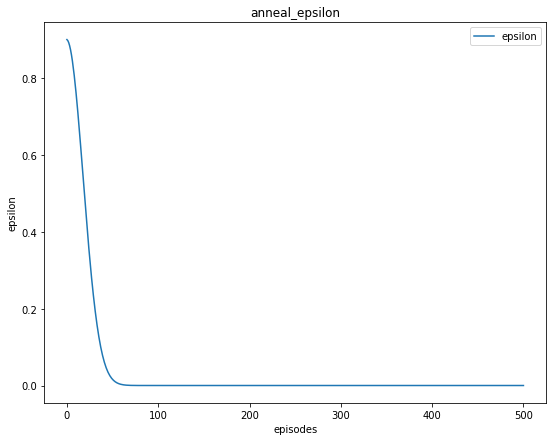

In [277]:
# 1.5 - anneal earlier then the last episode
# ----- Question: how does this function look like? -----

episodes = 500
episode = 0
eps = 0.9
eps_list = []
while episode<=episodes:
  eps = max(0, eps * (1 - episode / episodes * 1.5))
  eps_list.append(eps)
  episode+=1

plt.figure(figsize=(9, 7))
plt.plot(eps_list, label = 'epsilon')
plt.ylabel('epsilon')
plt.xlabel('episodes')
plt.title('anneal_epsilon')
plt.legend()
plt.show()

In [261]:
class QLearning:
    """
    In this class you can implement the Q-learning algorithm.
    The algorithm will run trajectories in the environment (grid world)
    and according to the transitions ()
    """
    def __init__(self, gridworld, gamma, alpha, episodes):
        self.gridworld = gridworld
        self.gamma = gamma
        self.alpha = alpha
        self.episodes = episodes
        # create table
        size = gridworld.size
        # ----- implement this -----
        self.q_table = np.zeros((4, size[0], size[1]))     # create a numpy matrix for storing the q-values for each actions and states
        # epsilon greedy
        self.eps = 0.9  # with 90% probablility sample an action from A otherwise greedy
        self.episode = 0
        # preformance summary
        self.sum_rewards = []
        self.path = []
    
    def update(self, cell, action, reward, next_cell):
        # the update rule for q-learning
        r_t, c_t = cell  # current state
        r_tp1, c_tp1 = next_cell  # next state
        # ----- implement the update rule -----
        self.q_table[action, r_t, c_t] = self.q_table[action, r_t, c_t] + self.alpha * (reward + self.gamma * np.max(self.q_table[:, r_tp1, c_tp1]) - self.q_table[action, r_t, c_t])
    
    def choose_action(self, cell):
        r, c = cell
        # ----- choose the next action accroding to epsilon-greedy -----
        p = np.random.random() 

        if p < self.eps:
           action = np.random.choice(4)
        
        else:
          action = np.argmax(self.q_table[:, r, c])
        
        return action
    
    def anneal_epsilon(self):
        # 1.5 - anneal earlier then the last episode
        # ----- Question: how does this function look like? -----

        ###################### ANSWER #########################
        
        # Plot shown above
        # we want to reduce exploration after every episode so that
        # the algorithm can be optimal (hoping the agent has learnt something
        # useful over the past epsiodes) otherwise with eps prob. agebt would keep on
        # exploring actions and take more iterations in each 
        # episodes to reach optimum in gridworld case.

        #######################################################
           
        self.eps = max(0, self.eps * (1 - self.episode / self.episodes * 1.5))
    
    
    def one_episode(self):  # plays an episode
        # This function is responsible for running the agent 
        # for one episode.
        # During each transition, the Q-function is updated.
        # ----- implement the missing parts -----
        cntr = 0  # counter to avoid infinite loops when the agent stucks in the grid and can not reach the terminal state
        # ----- reset the gridworld -----
        self.gridworld.reset()
        # ----- append zero at the end of sum_rewards -----
        self.sum_rewards.append(0) 
        # ---- cycle until termination (end of the current episode) or an upper limit (e.g. 5000)
        while not self.gridworld.in_terminal() and cntr < 5000:
          # ----- increase the counter -----
          cntr+=1  
          # ----- get the current cell -----
          cell = self.gridworld.current_cell
          # ----- choose the action -----
          action = self.choose_action(cell)
          # ----- get the reward -----
          reward = self.gridworld.reward(cell, action)
          # ----- make one transition and store -----
          next_cell = self.gridworld.transition(cell, action)
          # ----- update the q-table -----
          self.update(cell, action, reward, next_cell)
          # ----- add the reward to the last element in sum_rewards -----
          self.sum_rewards[-1] = self.sum_rewards[-1] + reward

        # ----- anneal epsilon -----
        self.anneal_epsilon()
        # ----- increase the episode counter -----
        self.episode += 1
       
    
    def trajectory(self):
        self.gridworld.reset()
        self.path = []
        sum_rewards = 0
        itr = 0
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            itr += 1
            self.path.append((r, c))
        print('Optimal Path: ' + str(self.path))
        
        return sum_rewards

    def is_learning_finished(self):  # depands on the number of episodes
        return self.episode > self.episodes

In [262]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.title("Q-learning algorithm's learning curve")
    plt.show()

-107
-137
-29
-126
-162
-79
-93
-95
-280
-81
-37
-15
-88
-102
-171
-61
-44
-15
-22
-26
-32
-79
-21
-99
-32
-93
-27
-18
-22
-28
-41
-34
-23
-40
-74
-14
-33
-28
-23
-28
-13
-19
-59
-85
-16
-10
-58
-22
-65
-18
-19
-28
-17
-12
-55
-26
-24
-23
-48
-35
-24
-17
-60
-15
-35
-26
-18
-16
-57
-19
-13
-28
-12
-30
-15
-32
-33
-29
-13
-26
-47
-9
-26
-30
-25
-15
-29
-13
-8
-52
-16
-18
-16
-17
-35
-21
-18
-14
-12
-43
-31
-15
-10
-27
-26
-17
-12
-36
-14
-10
-32
-20
-33
-14
-21
-14
-11
-32
-14
-14
-16
-14
-11
-29
-15
-22
-12
-9
-45
-14
-17
-16
-13
-17
-9
-13
-20
-11
-31
-12
-20
-15
-11
-9
-14
-43
-21
-9
-22
-10
-17
-10
-21
-31
-11
-12
-11
-10
-15
-10
-28
-10
-20
-10
-11
-36
-9
-10
-15
-9
-14
-14
-35
-14
-11
-15
-9
-11
-20
-9
-12
-14
-22
-28
-10
-8
-12
-9
-14
-13
-10
-10
-8
-34
-8
-9
-12
-9
-13
-11
-9
-18
-14
-13
-12
-18
-8
-11
-15
-13
-9
-11
-10
-10
-14
-8
-9
-13
-12
-11
-45
-10
-10
-11
-13
-12
-11
-18
-11
-11
-14
-11
-10
-9
-12
-8
-18
-8
-8
-12
-10
-13
-11
-10
-25
-11
-8
-18
-8
-8
-8
-15
-9
-12
-9
-12


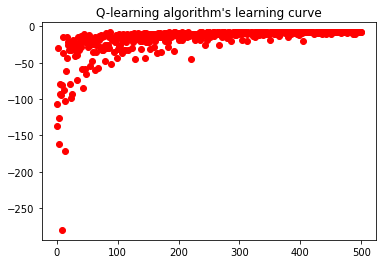

In [263]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3), (1, 1)]
terminating_state = (5, 3)
# q learning parameters
gamma = 0.9
alpha = 0.1
episodes = 500

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = QLearning(gw, gamma, alpha, episodes)  

while not solver.is_learning_finished():
    solver.one_episode()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)

In [264]:
class Sarsa:
    
    def __init__(self, gridworld, gamma, alpha, episodes):
        self.gridworld = gridworld
        self.gamma = gamma
        self.alpha = alpha
        self.episodes = episodes
        # create table
        size = gridworld.size
        # ----- implement this -----
        self.q_table = np.zeros((4, size[0], size[1]))    # create a numpy matrix for storing the q-values for each actions and states
        # epsilon greedy
        self.eps = 0.9
        self.episode = 0
        # preformance summary
        self.sum_rewards = []
        self.path = []
    
    def update(self, cell, action, reward, next_cell, next_action):
        # the update rule for sarsa learning
        r_t, c_t = cell  # current state
        r_tp1, c_tp1 = next_cell  # next state
        # ----- implement the update rule -----
        self.q_table[action, r_t, c_t] = self.q_table[action, r_t, c_t] + self.alpha * (reward + self.gamma * self.q_table[next_action, r_tp1, c_tp1] - self.q_table[action, r_t, c_t])
    
    def choose_action(self, cell):
        r, c = cell
        # ----- choose the next action accroding to epsilon-greedy -----
        p = np.random.random() 

        if p < self.eps:
           action = np.random.choice(4)
        
        else:
          action = np.argmax(self.q_table[:, r, c])
        
        return action
    
    def anneal_epsilon(self):
        # 1.5 - anneal earlier then the last episode
        self.eps = max(0, self.eps * (1 - self.episode / self.episodes * 1.5))
    
    def one_episode(self):  # plays an episode
        # ----- implement this -----
        # use the same logic like in Q-learning
        # be aware that this is an on-policy algorithm!
        # Question: Can you explain concisely what is the main difference
        # between on-policy and off-policy?

        ############################## Answer ##################################

          # Off-policy: Q-Learning Algorithm

            # Action-Value of the (next_state, next_action) pair is calucated using 
            # the next_action that has the max value from that next_state (Behavioral policy).
            # Here we don't use the next_action given by our target policy eg:(eps-greedy)
          
          # On-policy: SARSA Algorithm

            # Action-Value of the (next_state, next_action) pair is calculted using
            # the next_action given by our target policy (eg: eps-greedy). 
         
        ########################################################################

        cntr = 0  # counter to avoid infinite loops when the agent stucks in the grid and can not reach the terminal state
        # ----- reset the gridworld -----
        self.gridworld.reset()
        # ----- append zero at the end of sum_rewards -----
        self.sum_rewards.append(0) 
        # ---- cycle until termination (end of the current episode) or an upper limit (e.g. 5000)
        while not self.gridworld.in_terminal() and cntr < 5000:
          # ----- increase the counter -----
          cntr+=1  
          # ----- get the current cell -----
          cell = self.gridworld.current_cell
          # ----- choose the action -----
          action = self.choose_action(cell)
          # ----- get the reward -----
          reward = self.gridworld.reward(cell, action)
          # ----- make one transition and store -----
          next_cell = self.gridworld.transition(cell, action)
          #------- choose next action from next_cell--------#
          next_action = self.choose_action(next_cell)
          # ----- update the q-table -----
          self.update(cell, action, reward, next_cell, next_action)
          # ----- add the reward to the last element in sum_rewards -----
          self.sum_rewards[-1] = self.sum_rewards[-1] + reward

        # ----- anneal epsilon -----
        self.anneal_epsilon()
        # ----- increase the episode counter -----
        self.episode += 1


    
    def trajectory(self):
        self.gridworld.reset()
        self.path = []
        sum_rewards = 0
        itr = 0
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            itr += 1
            self.path.append((r, c))
        print("Optimal Path: " +str(self.path))
        return sum_rewards

    def is_learning_finished(self):
        return self.episode > self.episodes

In [265]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.title("SARSA algorithm's learning curve")
    plt.show()

-114
-94
-106
-41
-37
-103
-113
-29
-68
-79
-94
-80
-222
-89
-16
-91
-131
-102
-24
-61
-31
-24
-26
-22
-44
-39
-64
-54
-45
-78
-13
-42
-34
-31
-41
-18
-36
-25
-51
-27
-33
-31
-18
-62
-9
-22
-74
-25
-33
-11
-39
-62
-49
-15
-39
-27
-24
-21
-14
-28
-40
-19
-25
-47
-30
-21
-19
-11
-39
-22
-33
-33
-10
-28
-20
-47
-22
-38
-34
-35
-19
-23
-12
-13
-15
-10
-31
-32
-22
-17
-20
-15
-24
-28
-36
-17
-18
-26
-30
-19
-9
-32
-11
-18
-38
-9
-15
-17
-19
-32
-17
-10
-13
-26
-10
-38
-19
-36
-12
-16
-12
-10
-11
-18
-10
-43
-13
-25
-13
-15
-19
-14
-13
-13
-11
-13
-10
-52
-18
-11
-13
-11
-31
-16
-32
-9
-19
-12
-17
-23
-13
-10
-8
-11
-13
-14
-11
-34
-26
-9
-16
-12
-30
-13
-13
-8
-8
-8
-16
-13
-11
-10
-11
-13
-18
-12
-19
-47
-12
-11
-10
-12
-17
-8
-14
-9
-12
-9
-27
-13
-11
-9
-20
-11
-10
-23
-11
-14
-11
-10
-11
-12
-13
-15
-10
-15
-10
-8
-12
-8
-9
-29
-11
-9
-36
-8
-13
-8
-10
-9
-16
-9
-13
-12
-9
-21
-9
-11
-8
-11
-10
-9
-8
-17
-9
-16
-11
-15
-12
-13
-8
-8
-11
-10
-8
-29
-13
-20
-8
-8
-15
-11
-8
-10
-10
-11
-9

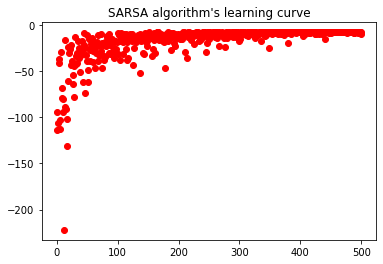

In [266]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3), (1, 1)]
terminating_state = (5, 3)
# q learning parameters
gamma = 0.9
alpha = 0.1
episodes = 500

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = Sarsa(gw, gamma, alpha, episodes)

while not solver.is_learning_finished():
    solver.one_episode()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)